# The gene thicket 
## metrics on pancreas

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, time
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import torch
import pickle
import matplotlib.pyplot as plt
import json

from libs.runTCDF import runTCDF
from libs.network_analysis import plot_graph, scores, plot_scores, plot_cartography, evaluation

In [3]:
gem = pd.read_csv('./inputs/Pancreas_Ms.csv', index_col = 0)

In [4]:
#import TF-target pairs
with open('../celloracle/TF_targets_pancreas.json', 'r') as fp:
    TF_info = json.load(fp)

In [5]:
start = time.time()
links, _, losses = runTCDF(gem, tf_target_pairs=TF_info, cuda=False, levels=0)
end = time.time()


 Analysis started for target:  0610010F05Rik
Epoch:  1 [0%] 	Loss: 0.072622
Early stopping

 Analysis started for target:  0610011F06Rik
Epoch:  1 [0%] 	Loss: 2.014101
Early stopping

 Analysis started for target:  0610030E20Rik
Epoch:  1 [0%] 	Loss: 0.012401
Early stopping

 Analysis started for target:  1110002L01Rik
Epoch:  1 [0%] 	Loss: 0.013699
Epoch: 500 [50%] 	Loss: 0.001121
Epoch: 1000 [100%] 	Loss: 0.001099

 Analysis started for target:  1110034G24Rik
Epoch:  1 [0%] 	Loss: 0.013221
Early stopping

 Analysis started for target:  1500009L16Rik
Epoch:  1 [0%] 	Loss: 1.362197
Early stopping

 Analysis started for target:  1700011H14Rik
Epoch:  1 [0%] 	Loss: 0.003186
Early stopping

 Analysis started for target:  1700026L06Rik
Epoch:  1 [0%] 	Loss: 0.056666
Early stopping

 Analysis started for target:  1700086L19Rik
Epoch:  1 [0%] 	Loss: 29.446142
Epoch: 500 [50%] 	Loss: 3.312838
Early stopping

 Analysis started for target:  1810041L15Rik
Epoch:  1 [0%] 	Loss: 0.006782
Early st

In [6]:
#save links
with open('./saved_links_loss_pancreas/links.pickle', 'wb') as handle:
    pickle.dump(links, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
#save losses
with open('./saved_links_loss_pancreas/losses.pickle', 'wb') as handle:
    pickle.dump(losses, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
end-start

840.6240334510803

In [9]:
links

,TF,importance,target
0,Etv1,1.521705,0610030E20Rik
1,Pax4,2.001486,1810041L15Rik
2,Sox9,-1.995250,1810041L15Rik
3,Sox9,-1.710529,4833439L19Rik
4,Pax4,-1.360379,6430573F11Rik
...,...,...,...
398,Rora,1.926478,Zim1
399,Etv1,1.624005,Zim1
400,Etv5,1.525893,Zim1
401,Ezh2,-1.384940,Zim1


In [10]:
network_scores = scores(links[["TF", "target"]])
network_scores = network_scores.sort_values(by='degree_out', ascending=False)

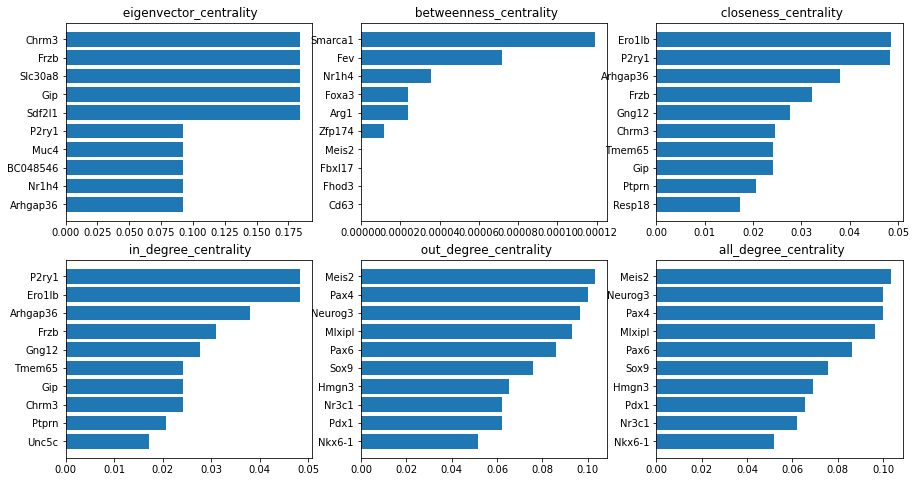

In [11]:
plot_scores(network_scores, n_genes=10, savefig='./Plots/pancreas_scores.png')

In [12]:
network_scores['classification'].unique()

array(['R6: Connector hub', 'R5: Provincial hub', 'R7: Kinless hub',
       'R2: Peripheral', 'R1: Ultra-peripheral'], dtype=object)

In [13]:
network_scores[network_scores['classification'] == 'R2: Peripheral']

,genes,eigenvector_centrality,betweenness_centrality,closeness_centrality,in_degree_centrality,out_degree_centrality,all_degree_centrality,degree_out,degree_in,degree_all,z_scores,membership,participation,classification
256,Tead2,2.194787e-08,0.0,0.000000,0.000000,0.048276,0.048276,14,0,14,2.094188,0,0.459184,R2: Peripheral
214,Rest,2.194787e-08,0.0,0.000000,0.000000,0.037931,0.037931,11,0,11,2.449490,13,0.644628,R2: Peripheral
286,Xbp1,2.194787e-08,0.0,0.000000,0.000000,0.037931,0.037931,11,0,11,1.313825,2,0.512397,R2: Peripheral
104,Hes1,2.194787e-08,0.0,0.000000,0.000000,0.024138,0.024138,7,0,7,1.732051,17,0.612245,R2: Peripheral
248,Srebf2,2.194787e-08,0.0,0.000000,0.000000,0.020690,0.020690,6,0,6,0.574213,0,0.277778,R2: Peripheral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Immp1l,5.048009e-07,0.0,0.003448,0.003448,0.000000,0.003448,0,1,1,-0.235702,5,1.000000,R2: Peripheral
116,Inppl1,9.205603e-02,0.0,0.003448,0.003448,0.000000,0.003448,0,1,1,-0.204124,1,1.000000,R2: Peripheral
117,Ins1,9.205699e-02,0.0,0.010345,0.010345,0.000000,0.010345,0,3,3,-0.212335,2,1.000000,R2: Peripheral
118,Ins2,9.205651e-02,0.0,0.006897,0.006897,0.000000,0.006897,0,2,2,-0.212335,2,1.000000,R2: Peripheral


In [14]:
network_scores[(network_scores['participation']<0.8) & (network_scores['participation']>0.6)]

,genes,eigenvector_centrality,betweenness_centrality,closeness_centrality,in_degree_centrality,out_degree_centrality,all_degree_centrality,degree_out,degree_in,degree_all,z_scores,membership,participation,classification
138,Meis2,2.194787e-08,0.000000,0.000000,0.000000,0.103448,0.103448,30,0,30,4.242641,5,0.602222,R6: Connector hub
143,Mlxipl,9.205603e-02,0.000000,0.000000,0.003448,0.093103,0.096552,26,1,28,3.162278,10,0.766582,R7: Kinless hub
214,Rest,2.194787e-08,0.000000,0.000000,0.000000,0.037931,0.037931,11,0,11,2.449490,13,0.644628,R2: Peripheral
104,Hes1,2.194787e-08,0.000000,0.000000,0.000000,0.024138,0.024138,7,0,7,1.732051,17,0.612245,R2: Peripheral
66,Etv1,2.194787e-08,0.000000,0.000000,0.000000,0.013793,0.013793,4,0,4,1.414214,21,0.625000,R2: Peripheral
217,Rora,2.194787e-08,0.000000,0.000000,0.000000,0.013793,0.013793,4,0,4,-0.105409,8,0.625000,R2: Peripheral
18,Arg1,5.048009e-07,0.000024,0.003448,0.003448,0.006897,0.010345,2,1,3,-0.337772,0,0.777778,R2: Peripheral
162,Nr1h4,9.206110e-02,0.000036,0.006207,0.003448,0.003448,0.006897,1,1,2,-0.105409,8,0.750000,R2: Peripheral
288,Zfp174,5.048009e-07,0.000012,0.003448,0.003448,0.003448,0.006897,1,1,2,-0.790569,8,0.750000,R2: Peripheral


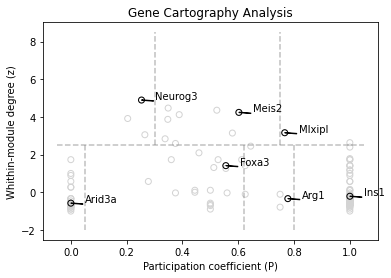

In [15]:
plot_cartography(network_scores, highlight_genes=['Neurog3', 'Ins1','Meis2', 'Arg1', 'Arid3a', 'Foxa3', 'Mlxipl'])
plt.savefig('./Plots/pancreas_gene_cartography.png')